Assignment 1

Name: Kaustubh Achyut Korpe

Class: BE Computer 'A'

Roll No.: 21CO067

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [ ]:
df=pd.read_csv('Boston-house-price-data.csv')

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
data=df

In [ ]:
X=df.drop('MEDV',axis=1)
y=df['MEDV'].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(128,input_shape=(1,),activation='relu',name='input'))
model.add(Dense(64,activation='relu',name='layer_1'))
model.add(Dense(1,name='output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ input (Dense)                        │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,690 (73.01 KB)

 Trainable params: 18,690 (73.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2,batch_size=32)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0170 - mae: 0.0920 - val_loss: 0.1104 - val_mae: 0.2355
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0156 - mae: 0.0885 - val_loss: 0.0978 - val_mae: 0.2135
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mae: 0.0835 - val_loss: 0.1044 - val_mae: 0.2261
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mae: 0.0888 - val_loss: 0.1083 - val_mae: 0.2212
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0157 - mae: 0.0912 - val_loss: 0.1123 - val_mae: 0.2305
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mae: 0.0921 - val_loss: 0.1046 - val_mae: 0.2197
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0197 - mae: 0.1092 - val_loss: 0.1105 - val_mae: 0.2340
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mae: 0.0874 - val_loss: 0.1147 - val_mae: 0.2410
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.02

In [ ]:
# Evaluate the model
output = model.evaluate(X_test, y_test)

# If you used 'loss' and 'mae' metrics during compilation
print(f"Test Loss: {output[0]:.4f}, Test MAE: {output[1]:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1393 - mae: 0.2504 
Test Loss: 0.1753, Test MAE: 0.2649


In [ ]:
print(f"Mean Squared Error: {output[0]}"
      ,f"Mean Absolute Error: {output[1]}",sep="\n")

Mean Squared Error: 0.17532797157764435
Mean Absolute Error: 0.2648872435092926


In [ ]:
y_pred=model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
y_pred

array([[ 0.48908836],
       [ 1.2174873 ],
       [-0.9173638 ],
       [ 0.06523211],
       [-0.5772183 ],
       [-0.38973802],
       [-0.27770287],
       [-0.93315554],
       [ 0.22561522],
       [-0.32487494],
       [-0.21209867],
       [-0.00564772],
       [-2.7331278 ],
       [-0.273857  ],
       [-0.6980774 ],
       [-0.07092027],
       [-0.37401527],
       [-1.2256494 ],
       [ 2.6833038 ],
       [-1.0967654 ],
       [ 0.2935872 ],
       [ 0.34696215],
       [-0.88772064],
       [ 0.18685034],
       [-0.6063108 ],
       [-0.7132653 ],
       [-0.289948  ],
       [-1.2092489 ],
       [-0.299281  ],
       [-0.40568036],
       [ 0.13908872],
       [ 0.03811017],
       [-0.51231194],
       [ 1.2645929 ],
       [-0.8749028 ],
       [-0.7415514 ],
       [ 0.87797475],
       [-0.46774185],
       [-0.1579483 ],
       [ 0.10906847],
       [-0.20657852],
       [ 1.1754131 ],
       [ 3.2524471 ],
       [-0.6121065 ],
       [ 0.33969992],
       [-0

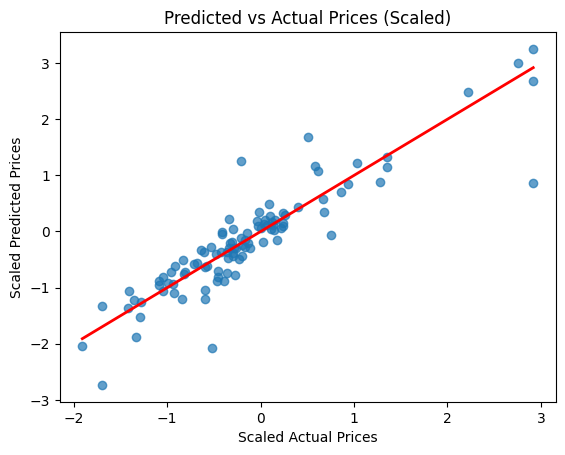

In [ ]:
import matplotlib.pyplot as plt

# Plot Predicted vs Actual values in scaled form
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Line for perfect prediction
plt.xlabel("Scaled Actual Prices")
plt.ylabel("Scaled Predicted Prices")
plt.title("Predicted vs Actual Prices (Scaled)")
plt.show()
